In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 4.1.3 Least Squares for Classification

Let's say we have $K=2$ classes, each coming from some Gaussian distribution. And let's say the points being classified are coming from $D=2$ dimensional space.

(0.8293552784899356, 0.576419591179928) (0.4567620702004752, 0.24533011551411077)


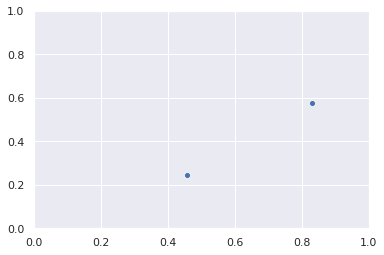

In [187]:
xmin, xmax, ymin, ymax = 0, 1, 0, 1

# Choose from the unit square means for two gaussians
xs = np.random.uniform(xmin,xmax,2)
ys = np.random.uniform(ymin,ymax,2)

mu1,mu2 = zip(xs,ys)
ax = sns.scatterplot(x = xs, y = ys);
def set_bounds(ax):
    ax.set_xbound(xmin,xmax)
    ax.set_ybound(ymin,ymax)
set_bounds(ax)
print(mu1,mu2)

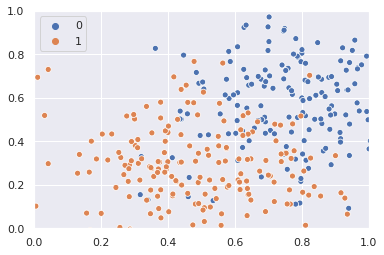

In [190]:
# Generate some data from those distributions:

num_points = 200
cov1 = 0.05*np.identity(2)
cov2 = 0.05*np.identity(2)
data1 = np.random.multivariate_normal(mu1,cov1,size=num_points)
data2 = np.random.multivariate_normal(mu2,cov2,size=num_points)
data_all = np.concatenate((data1,data2))
color_data = np.concatenate((np.repeat(0,num_points),np.repeat(1,num_points)))
ax = sns.scatterplot(x   = data_all.transpose()[0],
                     y   = data_all.transpose()[1],
                     hue = color_data)
set_bounds(ax)

Finally, we apply the least squares method described in the text to find the optimal parameter matrix $W$:

In [191]:
X = np.concatenate((np.ones(2*num_points).reshape(-1,1),data_all),axis=1) # This is \tilde{X} from text
T = np.repeat([[1,0],[0,1]],[num_points,num_points],axis=0)

In [192]:
W = np.linalg.solve(X.transpose() @ X, X.transpose() @ T)

The decision boundary will be the set of points $(x_1,x_2)$ for which $[x_1\,x_2]W$ has its first and second components being equal. In other words it's the preimage of the hyperplane $y_1=y_2$ under the mapping $(x_1,x_2)\mapsto (y_1,y_2) = [x_1\,x_2]W$. Since linear constraints of $T$ are preserved by predictions (see bottom half of p185), we know that the sum of the entries of $[x_1\,x_2]W$ will be $1$. Therefore the decision boundary will be the set of points for which $[x_1\,x_2]W$ has, say, its first component being $\frac{1}{2}$.

Using this idea we can plot the decision boundary:

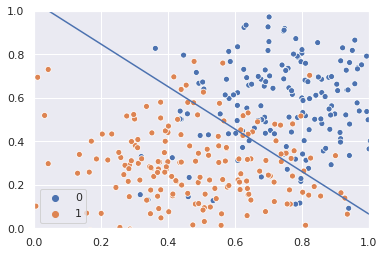

In [193]:
w01,w11,w21 = W[:,0]
ax = sns.lineplot(x = [0,1],y=[(0.5-w01)/w21,(0.5-w01-w11)/w21])
ax = sns.scatterplot(x   = data_all.transpose()[0],
                     y   = data_all.transpose()[1],
                     hue = color_data)
set_bounds(ax)